# Linear Regression Formatting Practice Dataset


## Visa Stocks Dataset from Kaggle (2020-2024)
https://www.kaggle.com/datasets/itshappy/visa-stocks-dataset


In [444]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as pt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [379]:
df = pd.read_csv('visa_stock_data.csv')

In [381]:
df

,Date,Year,Open,High,Low,Close,Volume,Adj Close
0,2020-01-02,2020,189.000000,191.139999,188.720001,191.119995,8733000,185.551498
1,2020-01-03,2020,188.410004,190.960007,187.919998,189.600006,4899700,184.075821
2,2020-01-06,2020,188.000000,189.210007,187.160004,189.190002,10109500,183.677719
3,2020-01-07,2020,189.589996,190.100006,188.600006,188.690002,4392300,183.192276
4,2020-01-08,2020,189.490005,192.500000,188.800003,191.919998,5712000,186.328171
...,...,...,...,...,...,...,...,...
991,2023-12-22,2023,260.000000,261.209991,258.220001,258.429993,5111500,257.949005
992,2023-12-26,2023,258.529999,259.739990,258.529999,259.160004,2085100,258.677643
993,2023-12-27,2023,259.250000,259.769989,258.309998,258.929993,4034700,258.448059
994,2023-12-28,2023,258.540009,260.970001,258.540009,260.399994,3020500,259.915344


## Dataset Review


In [384]:
df.shape

(996, 8)

In [386]:
df.describe()

,Year,Open,High,Low,Close,Volume,Adj Close
count,996.000000,996.000000,996.000000,996.000000,996.000000,9.960000e+02,996.000000
mean,2021.493976,214.427249,216.635321,212.287701,214.480663,7.975313e+06,211.063042
std,1.118579,20.072453,19.599797,20.486323,20.078492,3.874536e+06,20.832806
min,2020.000000,141.330002,143.350006,133.929993,135.740005,1.640900e+06,131.975922
25%,2020.000000,201.007496,203.837498,199.329998,201.315002,5.417725e+06,197.245491
50%,2021.000000,213.860001,216.174995,211.625000,213.724998,7.002650e+06,210.455566
75%,2022.000000,229.054996,230.877499,227.352501,229.282505,9.439075e+06,226.220158
max,2023.000000,263.190002,263.250000,259.670013,262.380005,3.837960e+07,261.891663


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       996 non-null    object 
 1   Year       996 non-null    int64  
 2   Open       996 non-null    float64
 3   High       996 non-null    float64
 4   Low        996 non-null    float64
 5   Close      996 non-null    float64
 6   Volume     996 non-null    int64  
 7   Adj Close  996 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 62.4+ KB


In [390]:
df.isnull().sum()

Date         0
Year         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

No null columns exist

## Visualizing the data

We will create 3 graphs each comparing the date to seperate values
- Closing Value
- Adjusted Closing Value
- Volume

Converting the date object to a date datatype for pandas

In [396]:
df['Date'] = pd.to_datetime(df.Date)

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       996 non-null    datetime64[ns]
 1   Year       996 non-null    int64         
 2   Open       996 non-null    float64       
 3   High       996 non-null    float64       
 4   Low        996 non-null    float64       
 5   Close      996 non-null    float64       
 6   Volume     996 non-null    int64         
 7   Adj Close  996 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 62.4 KB


### Visualizing 

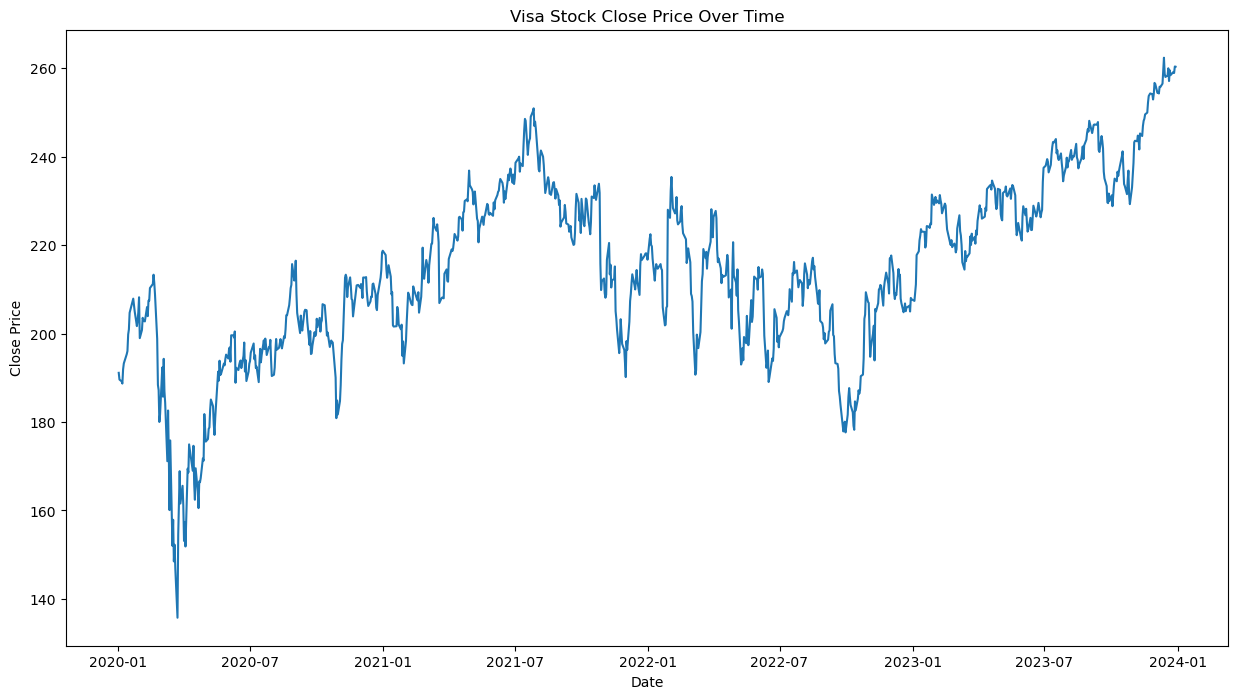

In [401]:
pt.figure(figsize=(15, 8))
pt.plot(df['Date'], df['Close'])
pt.xlabel('Date')
pt.ylabel('Close Price')
pt.title('Visa Stock Close Price Over Time')
pt.show()

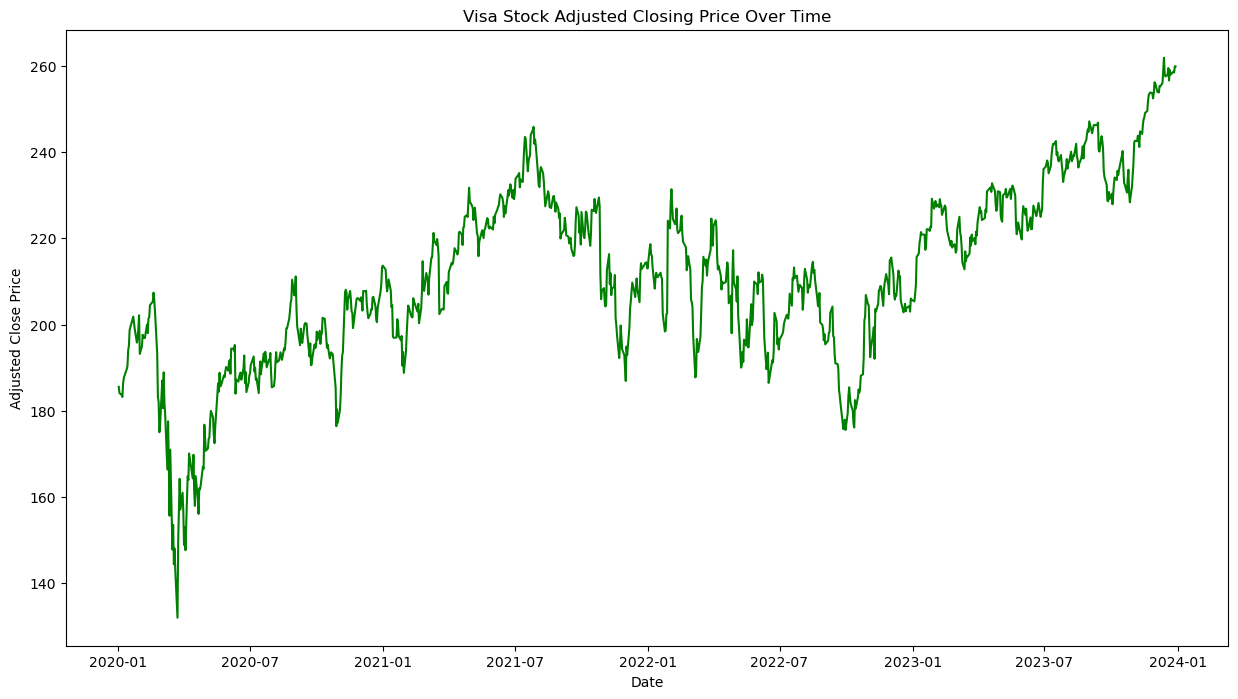

In [403]:
pt.figure(figsize=(15, 8))
pt.plot(df['Date'], df['Adj Close'], color= 'green')
pt.xlabel('Date')
pt.ylabel('Adjusted Close Price')
pt.title('Visa Stock Adjusted Closing Price Over Time')
pt.show()

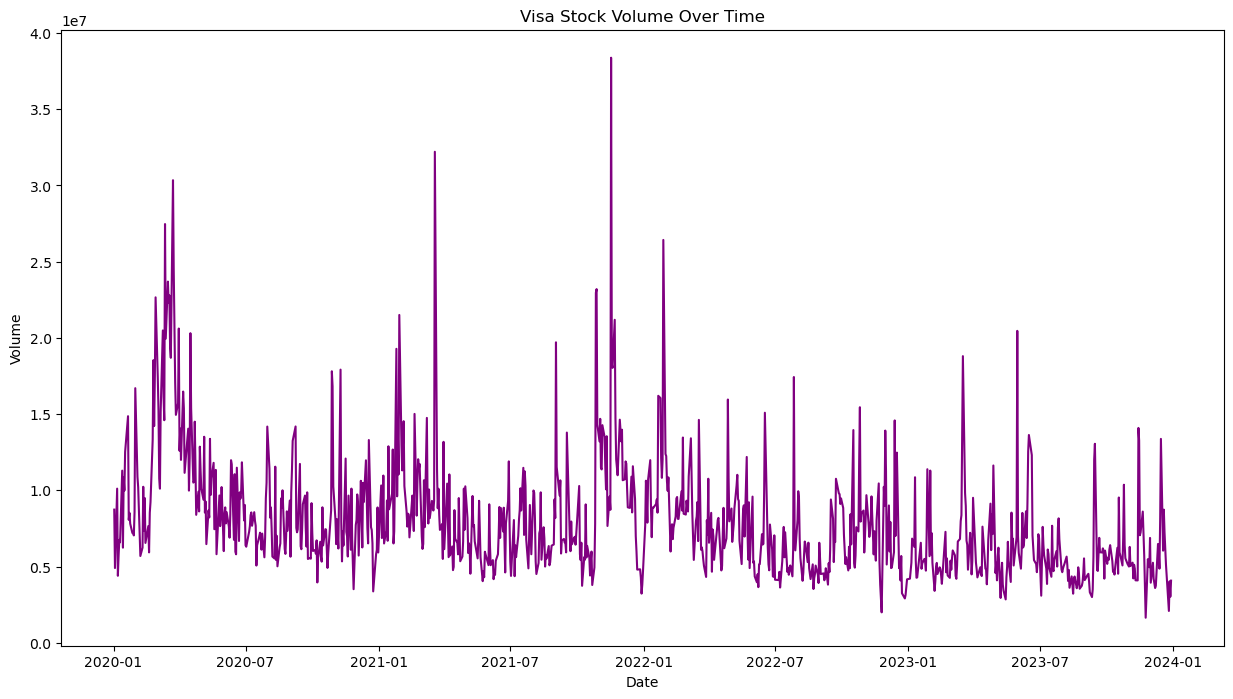

In [404]:
pt.figure(figsize=(15, 8))
pt.plot(df['Date'], df['Volume'], color= 'purple')
pt.xlabel('Date')
pt.ylabel('Volume')
pt.title('Visa Stock Volume Over Time')
pt.show()

Multiple Linear Regression Analysis


In [408]:
x = df.drop(columns = ['Date', 'Year', 'Adj Close'])

In [410]:
x

,Open,High,Low,Close,Volume
0,189.000000,191.139999,188.720001,191.119995,8733000
1,188.410004,190.960007,187.919998,189.600006,4899700
2,188.000000,189.210007,187.160004,189.190002,10109500
3,189.589996,190.100006,188.600006,188.690002,4392300
4,189.490005,192.500000,188.800003,191.919998,5712000
...,...,...,...,...,...
991,260.000000,261.209991,258.220001,258.429993,5111500
992,258.529999,259.739990,258.529999,259.160004,2085100
993,259.250000,259.769989,258.309998,258.929993,4034700
994,258.540009,260.970001,258.540009,260.399994,3020500


In [412]:
y = df['Adj Close']

In [414]:
y

0      185.551498
1      184.075821
2      183.677719
3      183.192276
4      186.328171
          ...    
991    257.949005
992    258.677643
993    258.448059
994    259.915344
995    259.865448
Name: Adj Close, Length: 996, dtype: float64

In [416]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4,random_state = 24)

In [418]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [420]:
c = lr.intercept_
m = lr.coef_


In [422]:
c

-9.974307393055966

In [424]:
m

array([-1.19063105e-02,  1.38973137e-01, -1.49210750e-01,  1.05329695e+00,
       -9.72198416e-08])

In [426]:
y_pred_train = lr.predict(x_train)

Text(0, 0.5, 'Predicted Close Values')

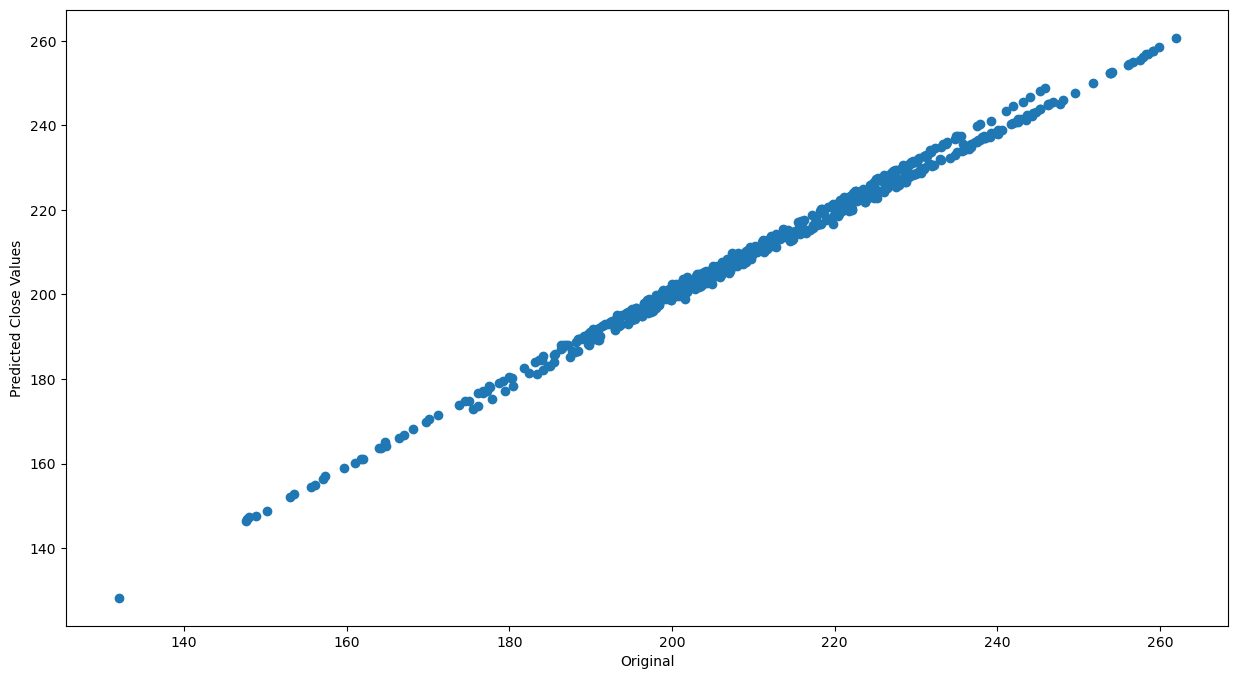

In [428]:
pt.figure(figsize = (15,8))
pt.scatter(y_train,y_pred_train)

pt.xlabel('Original')
pt.ylabel('Predicted Close Values')

This line appears to be an great fit, let's also check the R2 score with very little deviation in the values

In [431]:
r2 = r2_score(y_train,y_pred_train)

In [433]:
r2

0.9960449730935452

To analyze more correlation between the values, lets create a Heatmap

In [440]:
heat_df = df[['Close', 'Open', 'Adj Close', 'High', 'Volume', 'Low']]

In [442]:
correlation_matrix = heat_df.corr()
correlation_matrix

,Close,Open,Adj Close,High,Volume,Low
Close,1.000000,0.990394,0.997840,0.995341,-0.450802,0.995753
Open,0.990394,1.000000,0.988301,0.995856,-0.440827,0.995546
Adj Close,0.997840,0.988301,1.000000,0.993461,-0.457572,0.993332
High,0.995341,0.995856,0.993461,1.000000,-0.421153,0.994887
Volume,-0.450802,-0.440827,-0.457572,-0.421153,1.000000,-0.470531
Low,0.995753,0.995546,0.993332,0.994887,-0.470531,1.000000


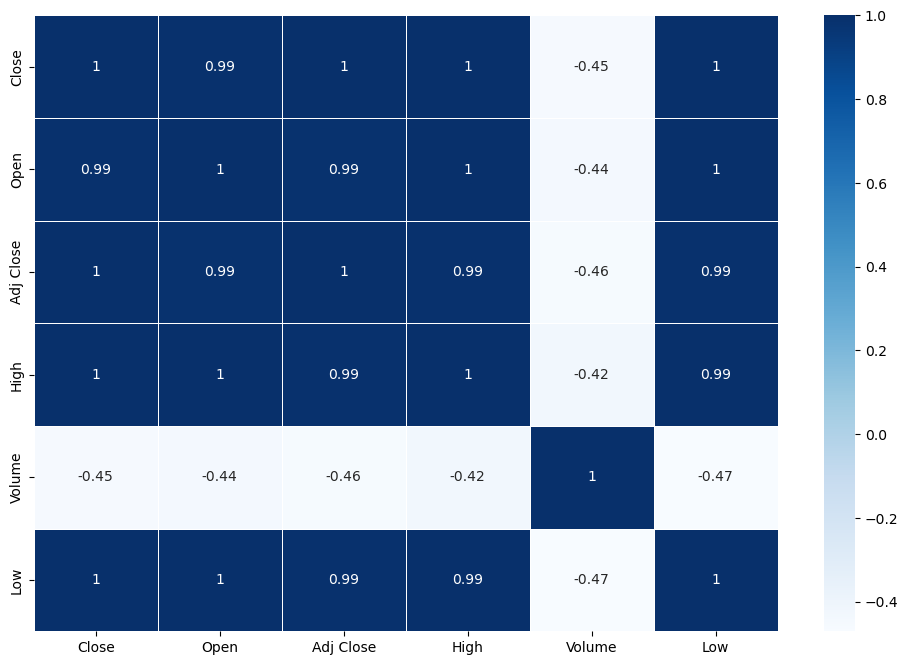

In [466]:
pt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot= True, cmap= "Blues", linewidths = 0.5)
pt.show()